# Trend Analysis

In [135]:
import pandas as pd
import matplotlib.pyplot as plt


In [136]:
# Load the datasets
results = pd.read_csv('input/results.csv')
shootouts = pd.read_csv('input/shootouts.csv')
goalscorers = pd.read_csv('input/goalscorers.csv')


In [137]:
# Display the first few rows of each dataset
results_head = results.head()
shootouts_head = shootouts.head()
goalscorers_head = goalscorers.head()

display(results_head, shootouts_head, goalscorers_head)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [138]:
# Check for missing values in each dataset
results_missing = results.isnull().sum()
shootouts_missing = shootouts.isnull().sum()
goalscorers_missing = goalscorers.isnull().sum()

display(results_missing, shootouts_missing, goalscorers_missing)


date           0
home_team     15
away_team     15
home_score    51
away_score    51
tournament     0
city           0
country        0
neutral        0
dtype: int64

date               0
home_team          0
away_team          0
winner             0
first_shooter    414
dtype: int64

date           0
home_team      0
away_team      0
team           0
scorer        50
minute       263
own_goal       2
penalty        2
dtype: int64

In [139]:
# Summary statistics for numeric columns
results_summary = results.describe()
shootouts_summary = shootouts.describe()
goalscorers_summary = goalscorers.describe()

display(results_summary, shootouts_summary, goalscorers_summary)


,home_score,away_score
count,47075.000000,47075.000000
mean,1.761190,1.183452
std,1.776751,1.402597
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


,date,home_team,away_team,winner,first_shooter
count,636,636,636,636,222
unique,561,180,189,174,85
top,2024-03-26,South Africa,Egypt,South Korea,Colombia
freq,5,18,15,15,11


,minute
count,43847.000000
mean,50.015212
std,26.354534
min,1.000000
25%,28.000000
50%,51.000000
75%,73.000000
max,122.000000


In [140]:
# Fill missing values in results.csv
results['home_team'].fillna('Unknown', inplace=True)
results['away_team'].fillna('Unknown', inplace=True)
median_home_score = results['home_score'].median()
median_away_score = results['away_score'].median()
results['home_score'].fillna(median_home_score, inplace=True)
results['away_score'].fillna(median_away_score, inplace=True)

# Verify the missing values have been handled
results_missing_after = results.isnull().sum()
display(results_missing_after)


date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [141]:
# Fill missing values in shootouts.csv
shootouts['first_shooter'].fillna('Unknown', inplace=True)

# Fill missing values in goalscorers.csv
goalscorers['scorer'].fillna('Unknown', inplace=True)
median_minute = goalscorers['minute'].median()
goalscorers['minute'].fillna(median_minute, inplace=True)
goalscorers['own_goal'].fillna(False, inplace=True)
goalscorers['penalty'].fillna(False, inplace=True)

# Verify the missing values have been handled
shootouts_missing_after = shootouts.isnull().sum()
goalscorers_missing_after = goalscorers.isnull().sum()

display(shootouts_missing_after, goalscorers_missing_after)


date             0
home_team        0
away_team        0
winner           0
first_shooter    0
dtype: int64

date         0
home_team    0
away_team    0
team         0
scorer       0
minute       0
own_goal     0
penalty      0
dtype: int64

In [142]:
# General statistics: number of matches, average scores, etc.
num_matches = results.shape[0]
average_home_score = results['home_score'].mean()
average_away_score = results['away_score'].mean()

# Home advantage: average scores for home vs. away teams
home_advantage = results.groupby('neutral').agg({'home_score': 'mean', 'away_score': 'mean'}).reset_index()

# Top scoring teams
top_scoring_teams = goalscorers['team'].value_counts().head(10).reset_index()
top_scoring_teams.columns = ['team', 'goals']

# Top players
top_players = goalscorers['scorer'].value_counts().head(10).reset_index()
top_players.columns = ['scorer', 'goals']

display("Top Scoring Teams", top_scoring_teams)
display("Top Players", top_players)

display(num_matches, average_home_score, average_away_score, home_advantage, top_scoring_teams, top_players)


'Top Scoring Teams'

,team,goals
0,Brazil,1046
1,Germany,963
2,Argentina,939
3,Spain,884
4,Netherlands,848
5,Mexico,843
6,Uruguay,793
7,England,768
8,France,767
9,Italy,724


'Top Players'

,scorer,goals
0,Cristiano Ronaldo,111
1,Robert Lewandowski,62
2,Romelu Lukaku,61
3,Harry Kane,55
4,Lionel Messi,54
5,Edin Džeko,50
6,Unknown,50
7,Ali Daei,49
8,Miroslav Klose,48
9,Carlos Ruiz,47


47126

1.760365827780843

1.1832534057632729

,neutral,home_score,away_score
0,False,1.789625,1.117169
1,True,1.678488,1.368179


,team,goals
0,Brazil,1046
1,Germany,963
2,Argentina,939
3,Spain,884
4,Netherlands,848
5,Mexico,843
6,Uruguay,793
7,England,768
8,France,767
9,Italy,724


,scorer,goals
0,Cristiano Ronaldo,111
1,Robert Lewandowski,62
2,Romelu Lukaku,61
3,Harry Kane,55
4,Lionel Messi,54
5,Edin Džeko,50
6,Unknown,50
7,Ali Daei,49
8,Miroslav Klose,48
9,Carlos Ruiz,47


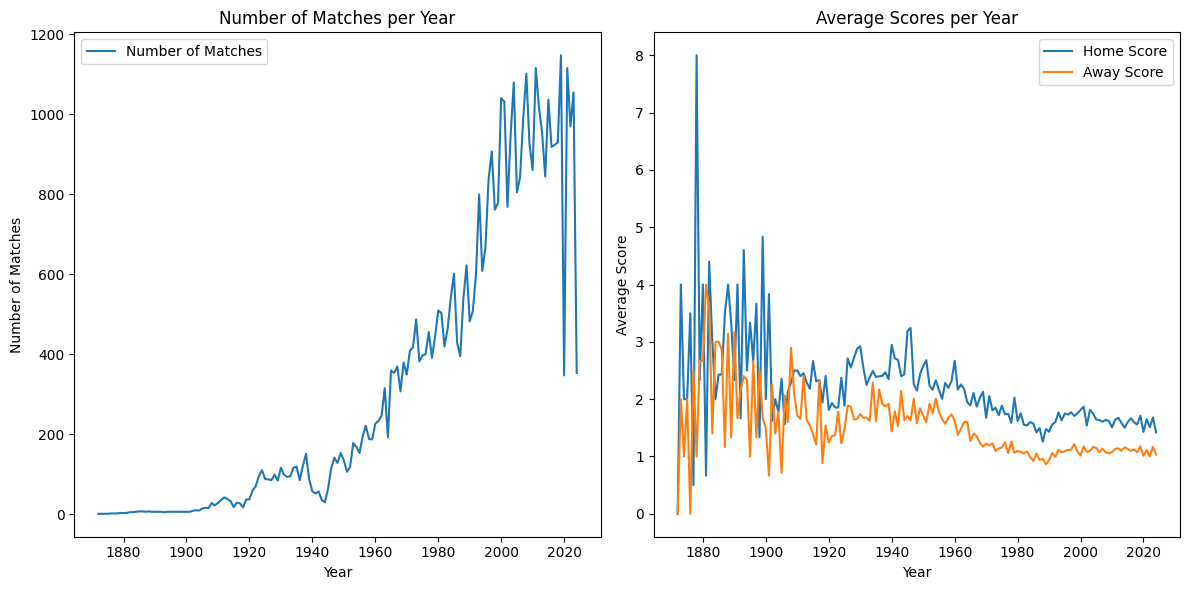

In [143]:
# Convert 'date' column to datetime format for temporal analysis
results['date'] = pd.to_datetime(results['date'])
goalscorers['date'] = pd.to_datetime(goalscorers['date'])

# Extract year from the 'date' column
results['year'] = results['date'].dt.year
goalscorers['year'] = goalscorers['date'].dt.year

# Temporal trends: number of matches and average scores over time
matches_per_year = results.groupby('year').size().reset_index(name='num_matches')
average_scores_per_year = results.groupby('year').agg({'home_score': 'mean', 'away_score': 'mean'}).reset_index()

# Plotting the trends
plt.figure(figsize=(12, 6))

# Number of matches per year
plt.subplot(1, 2, 1)
plt.plot(matches_per_year['year'], matches_per_year['num_matches'], label='Number of Matches')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.title('Number of Matches per Year')
plt.legend()

# Average scores per year
plt.subplot(1, 2, 2)
plt.plot(average_scores_per_year['year'], average_scores_per_year['home_score'], label='Home Score')
plt.plot(average_scores_per_year['year'], average_scores_per_year['away_score'], label='Away Score')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('Average Scores per Year')
plt.legend()

plt.tight_layout()
plt.show()


In [144]:
# Home advantage analysis: average scores by region, team, and over time

# Average scores by region
home_advantage_by_country = results.groupby('country').agg({
    'home_score': 'mean',
    'away_score': 'mean',
    'neutral': 'count'
}).reset_index().rename(columns={'neutral': 'num_matches'}).sort_values(by='num_matches', ascending=False).head(10)

# Average scores by team
home_advantage_by_team = results.groupby('home_team').agg({
    'home_score': 'mean',
    'away_score': 'mean',
    'neutral': 'count'
}).reset_index().rename(columns={'neutral': 'num_matches'}).sort_values(by='num_matches', ascending=False).head(10)

# Home advantage over time
home_advantage_over_time = results.groupby('year').agg({
    'home_score': 'mean',
    'away_score': 'mean'
}).reset_index()

display("Home Advantage by Country", home_advantage_by_country)
display("Home Advantage by Team", home_advantage_by_team)
display("Home Advantage over Time", home_advantage_over_time)


'Home Advantage by Country'

,country,home_score,away_score,num_matches
250,United States,1.536585,1.164819,1353
79,France,1.942503,1.130778,887
139,Malaysia,1.862069,1.285714,812
70,England,2.157470,1.063257,743
238,Thailand,1.738197,1.273247,699
191,Qatar,1.567335,1.098854,698
87,Germany,2.117910,1.080597,670
229,Sweden,2.293853,1.383808,667
248,United Arab Emirates,1.511945,1.121160,586
224,Spain,2.089655,0.915517,580


'Home Advantage by Team'

,home_team,home_score,away_score,num_matches
37,Brazil,2.470000,0.815000,600
12,Argentina,2.230769,0.851282,585
181,Mexico,2.036458,0.883681,576
267,South Korea,2.025830,0.763838,542
108,Germany,2.457249,1.052045,538
88,England,2.294559,0.881801,533
274,Sweden,2.315385,1.123077,520
99,France,2.067437,1.071291,519
129,Hungary,2.298969,1.191753,485
139,Italy,2.046122,0.794549,477


'Home Advantage over Time'

,year,home_score,away_score
0,1872,0.000000,0.000000
1,1873,4.000000,2.000000
2,1874,2.000000,1.000000
3,1875,2.000000,2.000000
4,1876,3.500000,0.000000
...,...,...,...
148,2020,1.429395,1.011527
149,2021,1.649327,1.109417
150,2022,1.511868,1.003096
151,2023,1.680266,1.168880


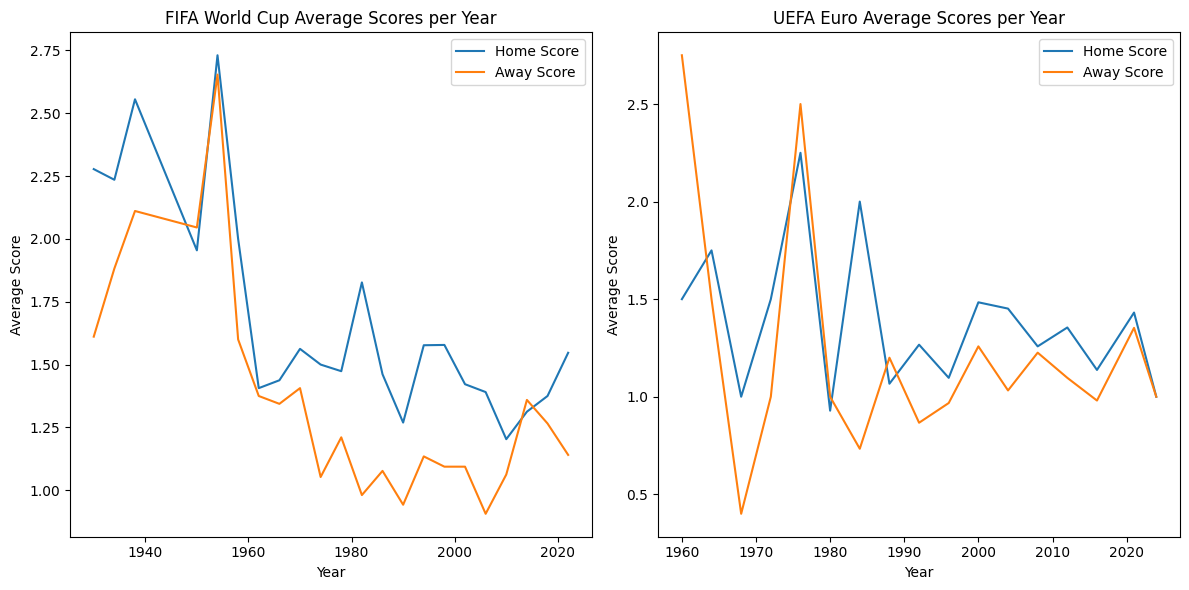

In [145]:
# Scoring trends in key tournaments: FIFA World Cup and UEFA Euro

# Filter data for FIFA World Cup and UEFA Euro
world_cup_data = results[results['tournament'] == 'FIFA World Cup']
euro_data = results[results['tournament'] == 'UEFA Euro']

# Aggregate average scores by year for each tournament
world_cup_trends = world_cup_data.groupby('year').agg({
    'home_score': 'mean',
    'away_score': 'mean'
}).reset_index()

euro_trends = euro_data.groupby('year').agg({
    'home_score': 'mean',
    'away_score': 'mean'
}).reset_index()

# Plotting the trends
plt.figure(figsize=(12, 6))

# FIFA World Cup trends
plt.subplot(1, 2, 1)
plt.plot(world_cup_trends['year'], world_cup_trends['home_score'], label='Home Score')
plt.plot(world_cup_trends['year'], world_cup_trends['away_score'], label='Away Score')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('FIFA World Cup Average Scores per Year')
plt.legend()

# UEFA Euro trends
plt.subplot(1, 2, 2)
plt.plot(euro_trends['year'], euro_trends['home_score'], label='Home Score')
plt.plot(euro_trends['year'], euro_trends['away_score'], label='Away Score')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('UEFA Euro Average Scores per Year')
plt.legend()

plt.tight_layout()
plt.show()


# Prediction of new Matches

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [147]:
# Load the datasets
results = pd.read_csv('input/results.csv')
goalscorers = pd.read_csv('input/goalscorers.csv')

# Fill missing values
results['home_team'].fillna('Unknown', inplace=True)
results['away_team'].fillna('Unknown', inplace=True)
median_home_score = results['home_score'].median()
median_away_score = results['away_score'].median()
results['home_score'].fillna(median_home_score, inplace=True)
results['away_score'].fillna(median_away_score, inplace=True)


In [148]:
results['goal_difference'] = results['home_score'] - results['away_score']
results['is_home_win'] = (results['goal_difference'] > 0).astype(int)
results['is_draw'] = (results['goal_difference'] == 0).astype(int)
results['is_away_win'] = (results['goal_difference'] < 0).astype(int)

features = results[['home_team', 'away_team', 'neutral']]
target = results['is_home_win']

# Convert categorical data to numerical using one-hot encoding
features = pd.get_dummies(features, columns=['home_team', 'away_team', 'neutral'])


In [149]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [150]:
# Train a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [153]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

display(f"Accuracy: {accuracy}")
display("Classification Report:")
print(report)
display("Confusion Matrix:")
display(conf_matrix)


'Accuracy: 0.6448122215149587'

'Classification Report:'

              precision    recall  f1-score   support

           0       0.66      0.65      0.65      4855
           1       0.63      0.64      0.64      4571

    accuracy                           0.64      9426
   macro avg       0.64      0.64      0.64      9426
weighted avg       0.64      0.64      0.64      9426



'Confusion Matrix:'

array([[3160, 1695],
       [1653, 2918]], dtype=int64)

In [155]:
# Function to prepare new game data for prediction
def prepare_new_game(home_team, away_team, neutral):
    new_game = pd.DataFrame({
        'home_team': [home_team],
        'away_team': [away_team],
        'neutral': [neutral]
    })
    new_game = pd.get_dummies(new_game, columns=['home_team', 'away_team', 'neutral'])
    new_game = new_game.reindex(columns=features.columns, fill_value=0)
    return new_game

# Predict the result of a new game
new_game = prepare_new_game('Argentina', 'France', True)
prediction = model.predict(new_game)
prediction_proba = model.predict_proba(new_game)

print(f"Predicted result: {'Home Win' if prediction[0] == 1 else 'Not Home Win'}")
print(f"Prediction probabilities: {prediction_proba}")


Predicted result: Not Home Win
Prediction probabilities: [[0.77988889 0.22011111]]
